In [8]:
import tensorflow as tf
from keras.datasets import cifar100
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [9]:
# data loaded
(training_images, training_labels), (testing_images, testing_labels) = cifar100.load_data()


169017344/169001437 [==============================] - 13s 0us/step


In [10]:
import pandas as pd
labels1 = pd.read_csv("/content/cifar100_labels.csv", header=None, index_col=0)

In [11]:
labels1.head()


,1
0,
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver


In [12]:
print("Shape of training images:", training_images.shape)
print("Shape of testing images:", testing_images.shape)
print("Shape of training labels:", training_labels.shape)

Shape of training images: (50000, 32, 32, 3)
Shape of testing images: (10000, 32, 32, 3)
Shape of training labels: (50000, 1)


In [13]:
training_images.shape

(50000, 32, 32, 3)

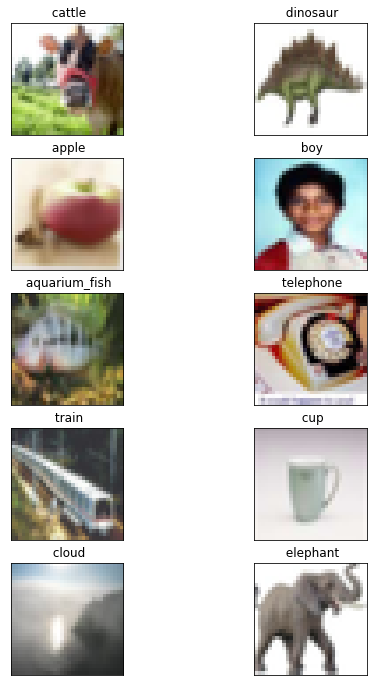

In [18]:
plt.figure(figsize=(8, 12))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(training_images[i])
    plt.title(labels[1][training_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [19]:
training_images = training_images/255.
testing_images = testing_images/255.

**cnn model**

In [21]:
model = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),

                            tf.keras.layers.Dense(len(np.unique(training_labels)), activation = 'softmax')])

In [22]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])


In [24]:
early_stop = EarlyStopping(monitor="val_loss", verbose=1, patience=3)


In [25]:
history = model.fit(training_images, training_labels, epochs=50, callbacks=[early_stop], validation_data=(testing_images, testing_labels))

Epoch 1/50
1563/1563 [==============================] - 19s 4ms/step - loss: 3.6630 - accuracy: 0.1379 - val_loss: 3.1130 - val_accuracy: 0.2308
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.9153 - accuracy: 0.2681 - val_loss: 2.7659 - val_accuracy: 0.3035
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5447 - accuracy: 0.3464 - val_loss: 2.6280 - val_accuracy: 0.3404
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2763 - accuracy: 0.4018 - val_loss: 2.5149 - val_accuracy: 0.3606
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0581 - accuracy: 0.4521 - val_loss: 2.4487 - val_accuracy: 0.3822
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8659 - accuracy: 0.4915 - val_loss: 2.4858 - val_accuracy: 0.3844
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6759 - accuracy: 0.5358 - val_loss: 2.5277 - val_accuracy

In [28]:
probs = model.predict(testing_images)
preds = np.argmax(prob, axis=1)

In [29]:
print(accuracy_score(testing_labels, preds))


0.3849


In [30]:
testing_labels=testing_labels.astype('float')
print(log_loss(testing_labels, probs))

2.619825723575517


In [31]:
from sklearn.metrics import confusion_matrix


**confusion_matrix**

In [32]:
confusion_matrix(testing_labels, pred)

array([[62,  2,  0, ...,  0,  0,  0],
       [ 1, 40,  0, ...,  1,  0,  0],
       [ 0,  1, 11, ...,  3,  2,  0],
       ...,
       [ 0,  0,  0, ..., 40,  1,  0],
       [ 1,  0,  2, ...,  1,  5,  1],
       [ 0,  0,  0, ...,  2,  0, 30]])

In [33]:
testing_labels = testing_labels.astype('int')



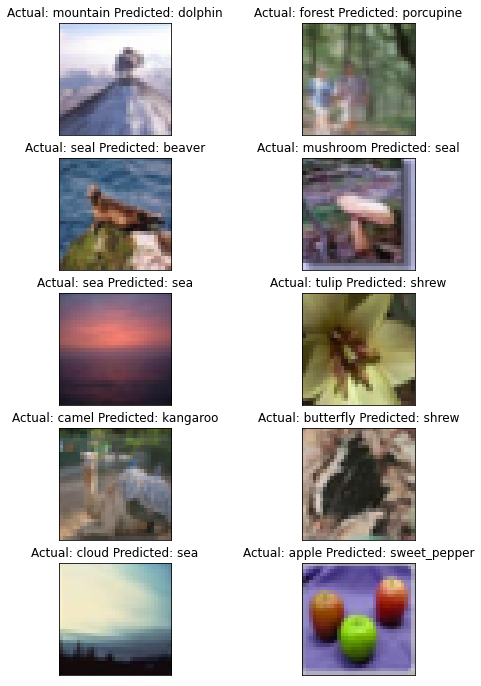

In [35]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(testing_images[i])
    string = "Actual:"+ labels[1][testing_labels[i][0]] + " Predicted:" + labels[1][pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
plt.show()